In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# ... (rest of your code)

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Check if y contains missing values and handle them
if y.isnull().any():
    # Option 1: Remove rows with missing values in 'Class'
    data = data.dropna(subset=['Class'])
    X = data.drop('Class', axis=1)
    y = data['Class']
    print("Rows with missing values in 'Class' removed.")

    # Option 2: Fill missing values with a suitable strategy (e.g., most frequent value)
    # y.fillna(y.mode()[0], inplace=True)
    # print("Missing values in 'Class' filled with most frequent value.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ... (rest of your code)

Rows with missing values in 'Class' removed.


Original dataset shape: Class
0.0    57371
1.0      159
Name: count, dtype: int64
Resampled dataset shape: Class
0.0    45897
1.0    45897
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11474
         1.0       0.87      0.84      0.86        32

    accuracy                           1.00     11506
   macro avg       0.94      0.92      0.93     11506
weighted avg       1.00      1.00      1.00     11506

Confusion Matrix:
[[11470     4]
 [    5    27]]
ROC AUC Score: 0.95


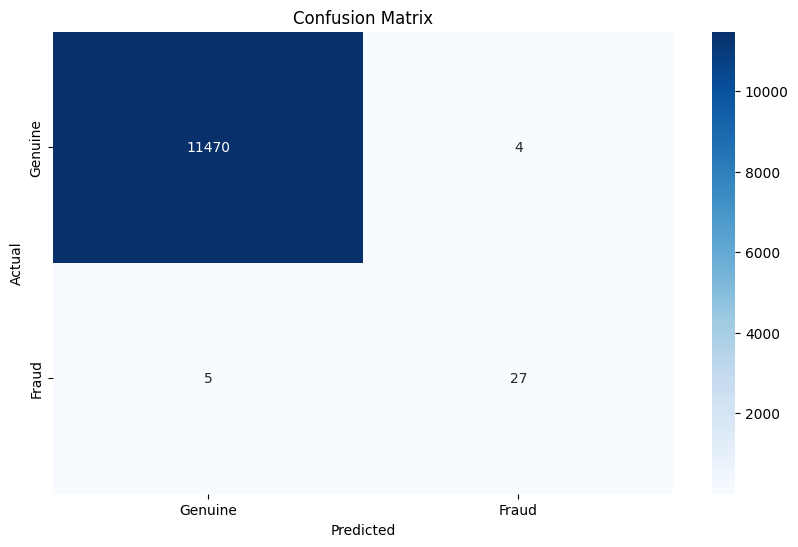

In [ ]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {y.value_counts()}')
print(f'Resampled dataset shape: {y_train_smote.value_counts()}')

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Visualize the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
